### Neural Network for Handwritten Digits Classification

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [6]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

In [7]:
len(x_train)

60000

In [8]:
len(x_test)

10000

In [9]:
x_train[0].shape

(28, 28)

In [10]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

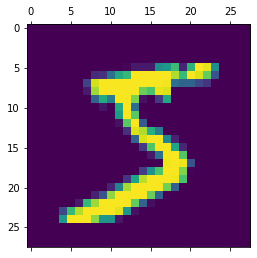

In [11]:
plt.matshow(x_train[0])

In [12]:
y_train[0]

5

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train = x_train/255
x_test = x_test/255

In [15]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [16]:
x_train_flattened.shape

(60000, 784)

### Very simple neural network with no hidden layers
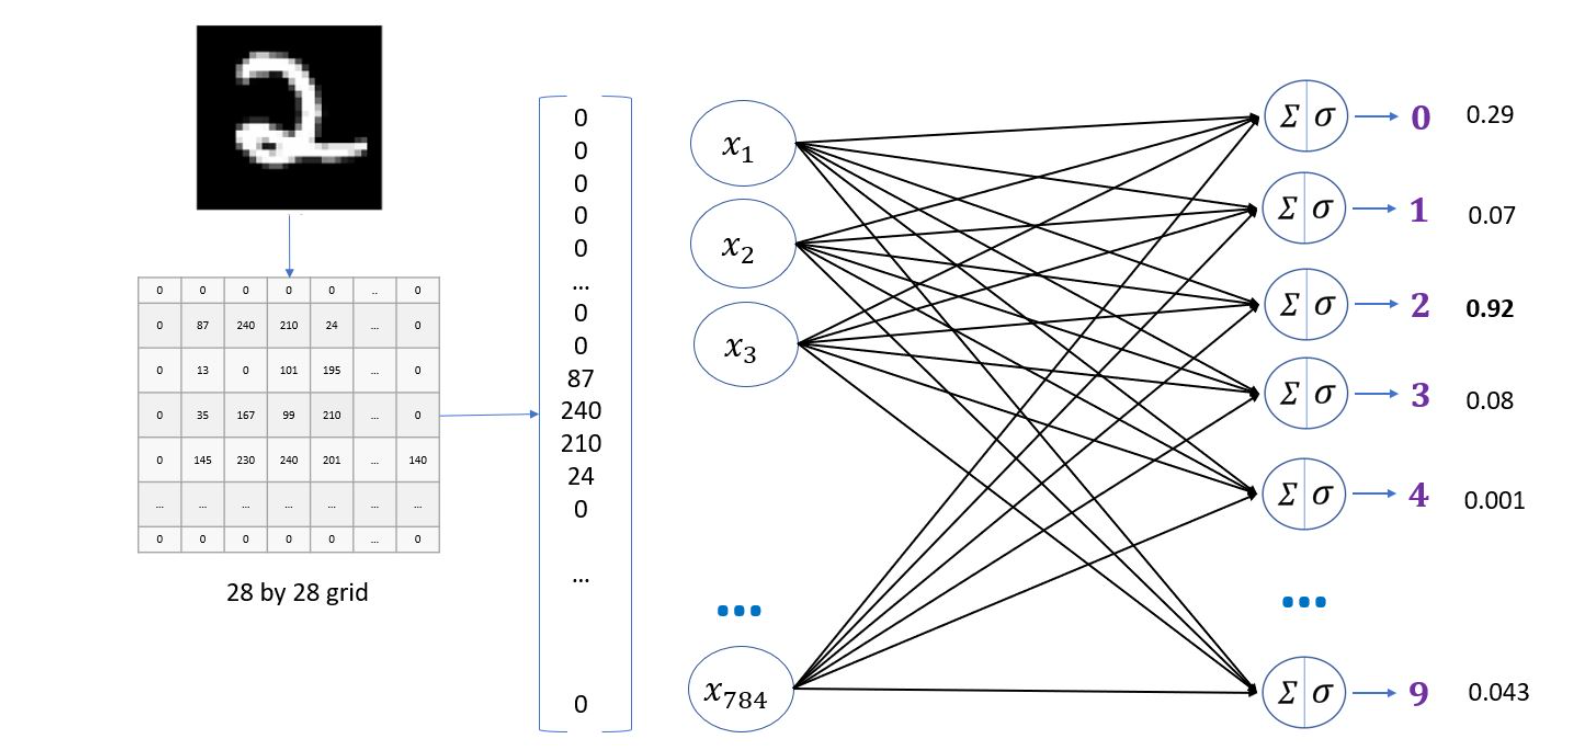

In [17]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape =(784,),activation='sigmoid')
])
model.compile(
optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4752 - accuracy: 0.8763
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3050 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2837 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2733 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2667 - accuracy: 0.9261


In [18]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2656 - accuracy: 0.9261


[0.26557910442352295, 0.9261000156402588]

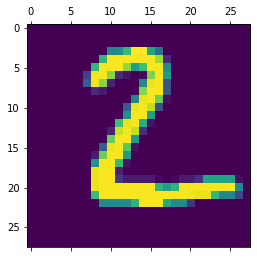

In [19]:
plt.matshow(x_test[1])

In [20]:
y_predict = model.predict(x_test_flattened)

313/313 [==============================] - 1s 1ms/step


In [21]:
y_predict[1]

array([4.9411896e-01, 3.9965142e-03, 9.9943978e-01, 4.3823442e-01,
       5.7765126e-10, 7.9844999e-01, 8.2247615e-01, 2.0952985e-12,
       1.6092065e-01, 3.3967513e-09], dtype=float32)

##### np.argmax finds a maximum element from an array and returns the index of it

In [22]:
np.argmax(y_predict[1])

2

In [23]:
y_test[1]

2

In [24]:
y_predict_labels = [np.argmax(i) for i in y_predict]

In [25]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [26]:
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [27]:
cm = tf.math.confusion_matrix(
    labels=y_test,
    predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   6,    9,  928,   14,    7,    5,   13,   10,   35,    5],
       [   4,    0,   18,  925,    0,   22,    2,   10,   17,   12],
       [   1,    1,    5,    2,  902,    0,   10,    5,    8,   48],
       [   8,    2,    5,   31,    9,  781,   16,    6,   27,    7],
       [  10,    3,    5,    1,    7,   12,  916,    2,    2,    0],
       [   1,    5,   23,    6,    5,    1,    0,  944,    2,   41],
       [   6,    8,    7,   23,    9,   28,   10,   11,  858,   14],
       [  10,    6,    2,   10,   19,    7,    0,   18,    5,  932]])>

Text(69.0, 0.5, 'Truth')

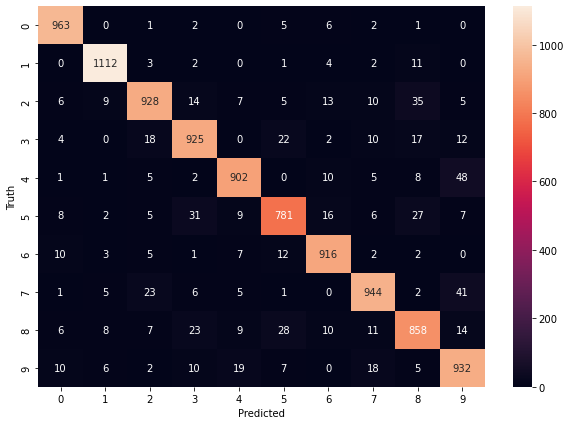

In [28]:
import seaborn as sn
import pandas as pd
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Adding hidden layer

In [29]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape =(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2727 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1228 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0868 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0670 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0541 - accuracy: 0.9835


In [30]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0811 - accuracy: 0.9752


[0.0810946375131607, 0.9751999974250793]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

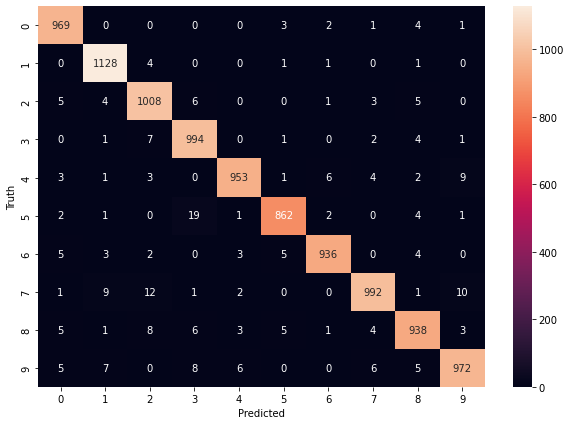

In [31]:
y_predict = model.predict(x_test_flattened)
y_predict_labels = [np.argmax(i) for i in y_predict]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Using Flatten layer so that we don't have to call .reshape on input dataset

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2745 - accuracy: 0.9217
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1241 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0879 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0666 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0530 - accuracy: 0.9829
